# Task 1

This notebook will compare the performance for different path finding algorithms that I implemented for the game described in Task 1.

In [1]:
#Allows me to import the modules in the src folder
#Code from https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.grid import *

When initialising a grid, the width and height are given, plus an optional seed which can be used to reproduced the same grid.
A grid with the given width and height will then be created, with each cell filled with a random number between 0 and 9.
Using the **display_grid** method the grid will be created. The green cell, represents the start position, the red cell represents the end and yellow cells represent the current position, or all the visited cells.

Below, a 4x4 grid is created with seed '123' is created and then displayed.

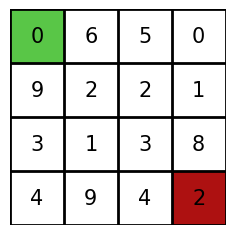

In [3]:
grid = Grid(4, 4, seed=123)
grid.display_grid([])

I have implemeented 3 different path finding algorithms. By calling each method on the previously created grid, a path will be created.

In [4]:
random_path = grid.random_path()
baseline_path = grid.custom_path()
dijkstra_path = grid.dijkstra_path()

Using the **traverse_path** method a passing a path as a parameter will display each step of the path, waiting an amount of time dependent on the current cell's number after each move.

This is the path generated by the random walk.

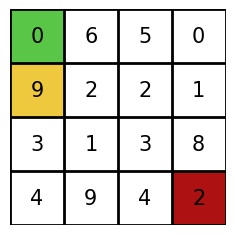

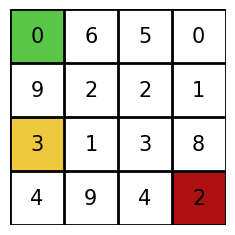

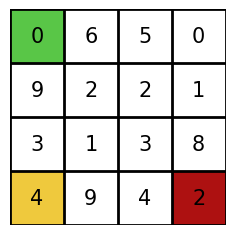

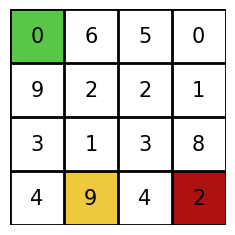

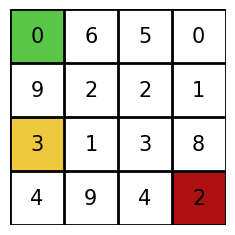

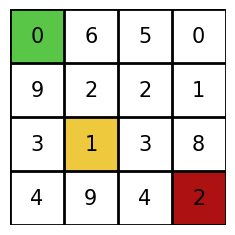

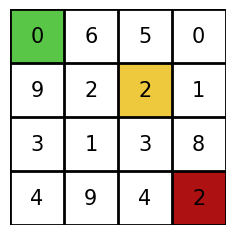

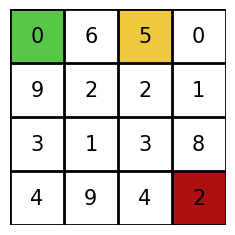

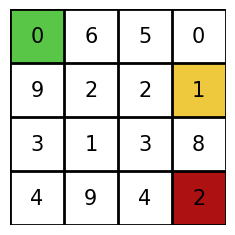

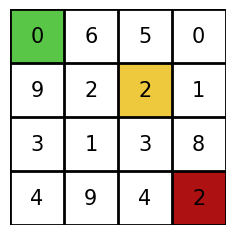

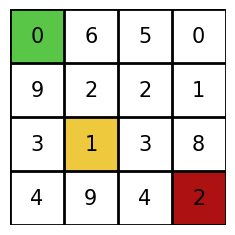

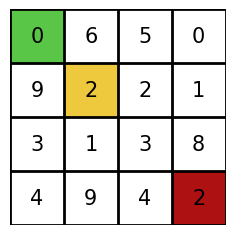

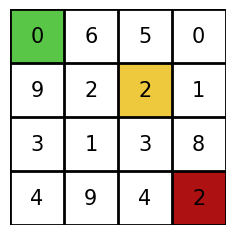

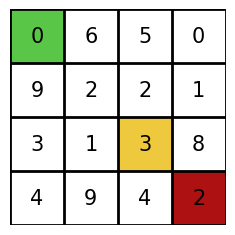

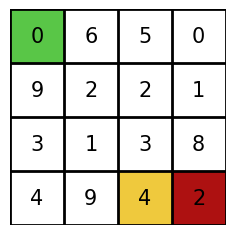

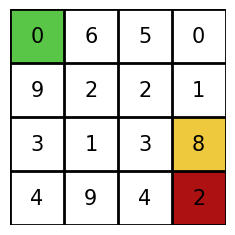

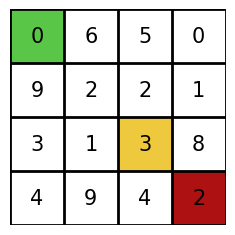

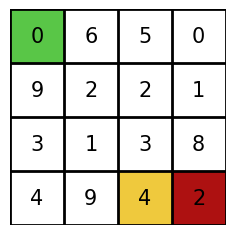

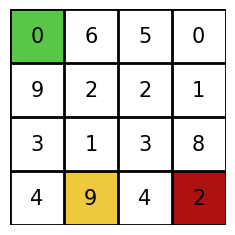

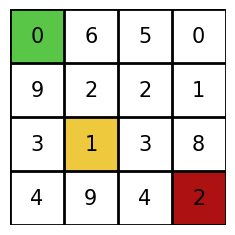

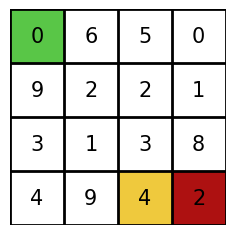

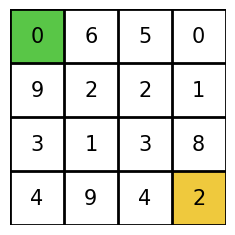

In [5]:
grid.traverse_path(random_path)

This are all the cells visited by the random walk.

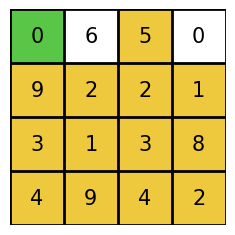

In [6]:
grid.display_grid(random_path)

This is the path generated by the baseline path finding method created by me.

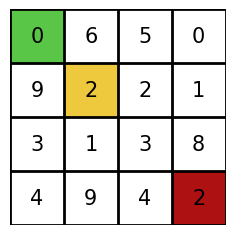

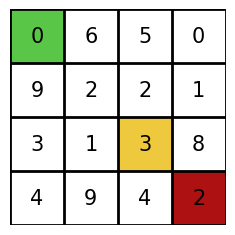

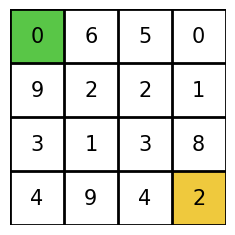

In [7]:
grid.traverse_path(baseline_path)

This are all the cells visited by the baseline path finding method.

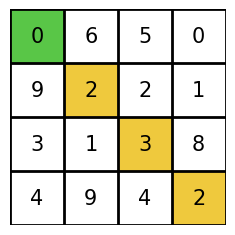

In [8]:
grid.display_grid(baseline_path)

This is the path generated by the dijkstra algorithm.

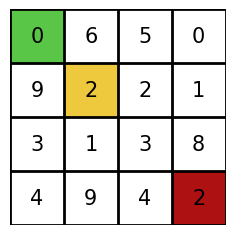

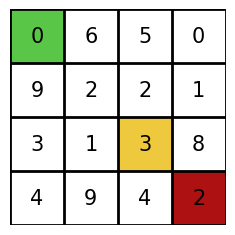

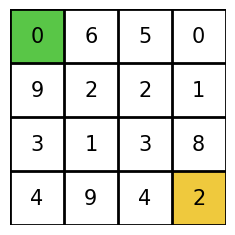

In [9]:
grid.traverse_path(dijkstra_path)

This are all the cells visited by the dijkstra algorithm.

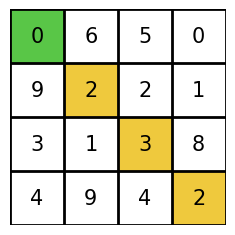

In [10]:
grid.display_grid(dijkstra_path)

Using the **get_path_length** method and passing a path as a parameter I can get the total length of the path which calculated by adding up the cost of each cell visited.

In [11]:
grid.get_path_length(random_path)

82

In [12]:
grid.get_path_length(baseline_path)

7

In [13]:
grid.get_path_length(dijkstra_path)

7

To compare the performance in terms of path length for each algorithm I create 100 different 4x4 grids and use all 3 algorithms on each one, saving the total path length for each path in a dataframe.

In [14]:
#Create dataframe to store results
path_lengths = pd.DataFrame(columns=["Random path", "Baseline path", "Dijkstra path"])

for i in range(100):
    seed = i
    grid = Grid(4, 4, seed)
    
    #Save the path length for each algorithm to dataframe
    path_lengths.loc[path_lengths.index.size] = [grid.get_path_length(grid.random_path()), 
                                                 grid.get_path_length(grid.custom_path()),
                                                 grid.get_path_length(grid.dijkstra_path())]

I display the results in the line charts below.

<Figure size 1300x700 with 0 Axes>

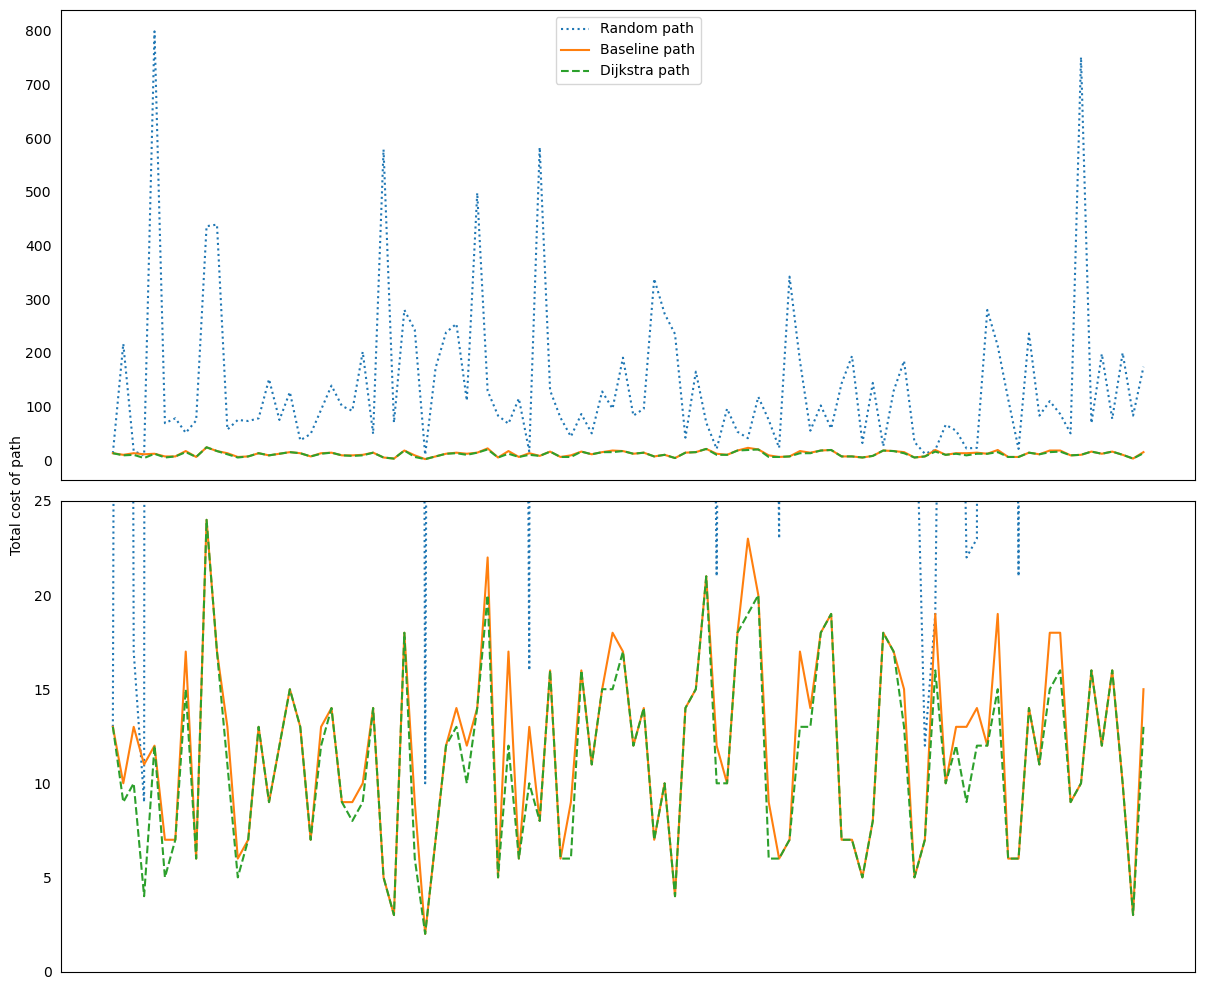

In [15]:
#Create 2 plots stacked vertically
plt.figure(figsize=(13, 7))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#Display line chart for each algorithm
ax1.plot(path_lengths["Random path"], ls=':', label='Random path')
ax1.plot(path_lengths["Baseline path"], ls='-', label='Baseline path')
ax1.plot(path_lengths["Dijkstra path"], ls='--', label='Dijkstra path')

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display legend
ax1.legend()

#Display line chart for each algorithm again
ax2.plot(path_lengths["Random path"], ls=':', label='Random path')
ax2.plot(path_lengths["Baseline path"], ls='-', label='Baseline path')
ax2.plot(path_lengths["Dijkstra path"], ls='--', label='Dijkstra path')

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Reduce the y limit for second graph so it's more zoomed in
ax2.set_ylim(0, 25)

#Set axis labels
fig.text(0, 0.5, "Total cost of path", va='center', rotation='vertical')
plt.tight_layout() 

In [16]:
path_lengths.describe()

,Random path,Baseline path,Dijkstra path
count,100.000000,100.000000,100.000000
mean,141.550000,11.990000,11.190000
std,147.734021,4.885549,4.681136
min,9.000000,2.000000,2.000000
25%,54.500000,7.750000,7.000000
50%,89.000000,12.000000,11.500000
75%,185.000000,15.250000,15.000000
max,799.000000,24.000000,24.000000


To see how grid size affects the path length I do it again but this time quadrupling the size of the grids and using 8x8 grids instead.

In [17]:
#Create dataframe to store results
path_lengths = pd.DataFrame(columns=["Random path", "Baseline path", "Dijkstra path"])

for i in range(100):
    seed = i
    grid = Grid(8, 8, seed)
    
    #Save the path length for each algorithm to dataframe
    path_lengths.loc[path_lengths.index.size] = [grid.get_path_length(grid.random_path()), 
                                                 grid.get_path_length(grid.custom_path()),
                                                 grid.get_path_length(grid.dijkstra_path())]

I display the results in the line charts below.

<Figure size 1300x700 with 0 Axes>

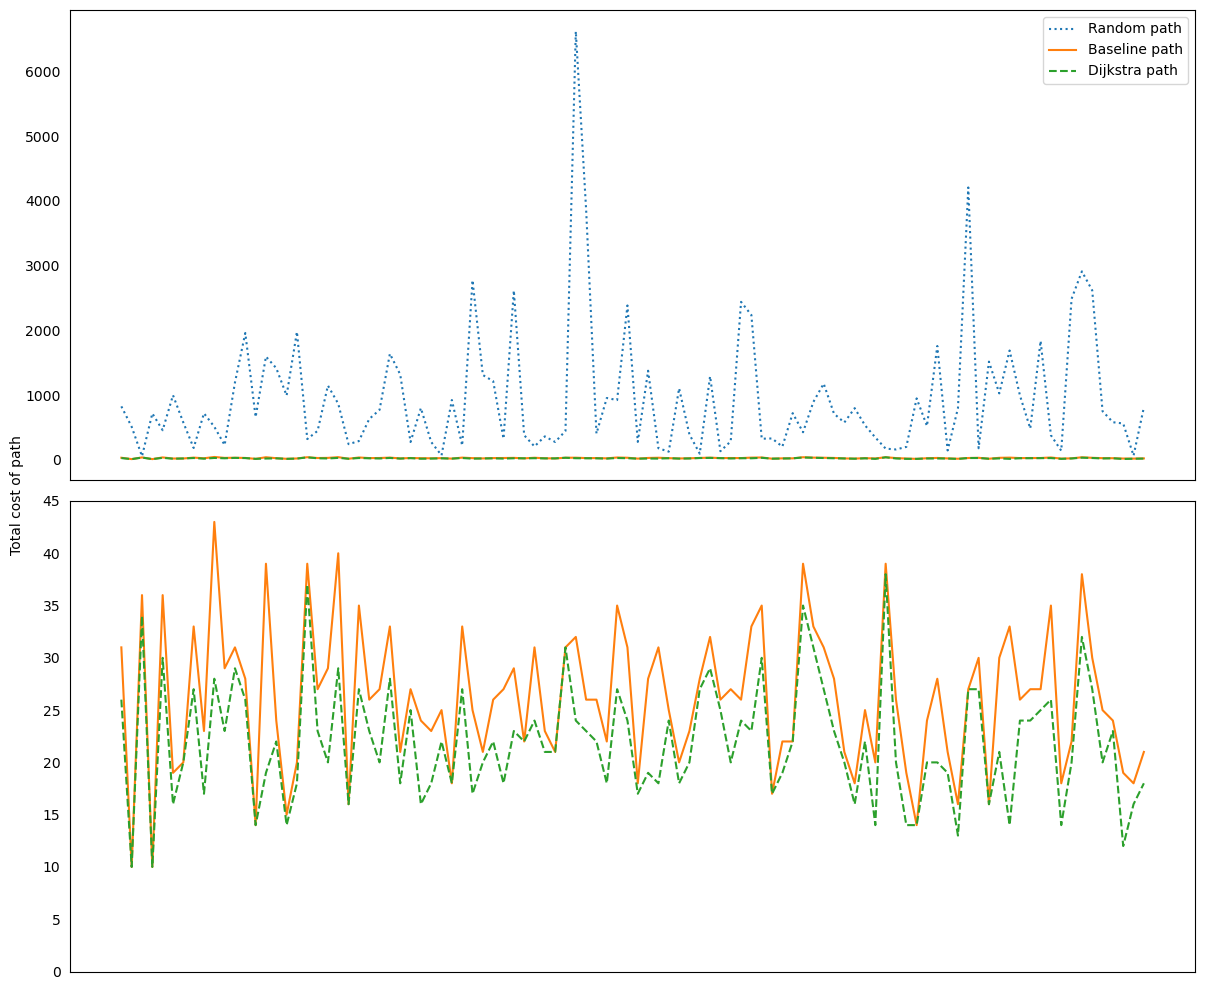

In [18]:
#Create 2 plots stacked vertically
plt.figure(figsize=(13, 7))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#Display line chart for each algorithm
ax1.plot(path_lengths["Random path"], ls=':', label='Random path')
ax1.plot(path_lengths["Baseline path"], ls='-', label='Baseline path')
ax1.plot(path_lengths["Dijkstra path"], ls='--', label='Dijkstra path')

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display legend
ax1.legend()

#Display line chart for each algorithm again
ax2.plot(path_lengths["Random path"], ls=':', label='Random path')
ax2.plot(path_lengths["Baseline path"], ls='-', label='Baseline path')
ax2.plot(path_lengths["Dijkstra path"], ls='--', label='Dijkstra path')

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Reduce the y limit for second graph so it's more zoomed in
ax2.set_ylim(0, 45)

#Set axis labels
fig.text(0, 0.5, "Total cost of path", va='center', rotation='vertical')
plt.tight_layout() 

In [19]:
path_lengths.describe()

,Random path,Baseline path,Dijkstra path
count,100.000000,100.00000,100.000000
mean,956.940000,26.13000,21.910000
std,1004.417222,6.86913,5.687298
min,54.000000,10.00000,10.000000
25%,312.250000,21.00000,18.000000
50%,685.000000,26.00000,22.000000
75%,1199.000000,31.00000,26.000000
max,6617.000000,43.00000,38.000000


To better understand how grid size affects path length for each algorithm I create 2400 grids ranging from 3x3 to 50x50 and again use all 3 algorithms on each one, saving the total path length for each path in dataframes.

In [20]:
#Create a dataframe for each algorithm
random_path_data = pd.DataFrame(columns=["Grid size", "Path length"])
baseline_path_data = pd.DataFrame(columns=["Grid size", "Path length"])
dijkstra_path_data = pd.DataFrame(columns=["Grid size", "Path length"])

for i in range(2400):
    #Increase grid size by 1 every 50 iterations, ranging from 3x3 to 50x50
    grid_size = math.floor(i / 50) + 3
    seed = i
    grid = Grid(grid_size, grid_size, seed)
    
    #Save the grid size and path length for each algorithm in its corresponding dataframe
    random_path_data.loc[random_path_data.index.size] = [f"{grid_size}x{grid_size}", grid.get_path_length(grid.random_path())] 
    baseline_path_data.loc[baseline_path_data.index.size] = [f"{grid_size}x{grid_size}", grid.get_path_length(grid.custom_path())] 
    dijkstra_path_data.loc[dijkstra_path_data.index.size] = [f"{grid_size}x{grid_size}", grid.get_path_length(grid.dijkstra_path())]
    

I display the results in the scatter charts below.

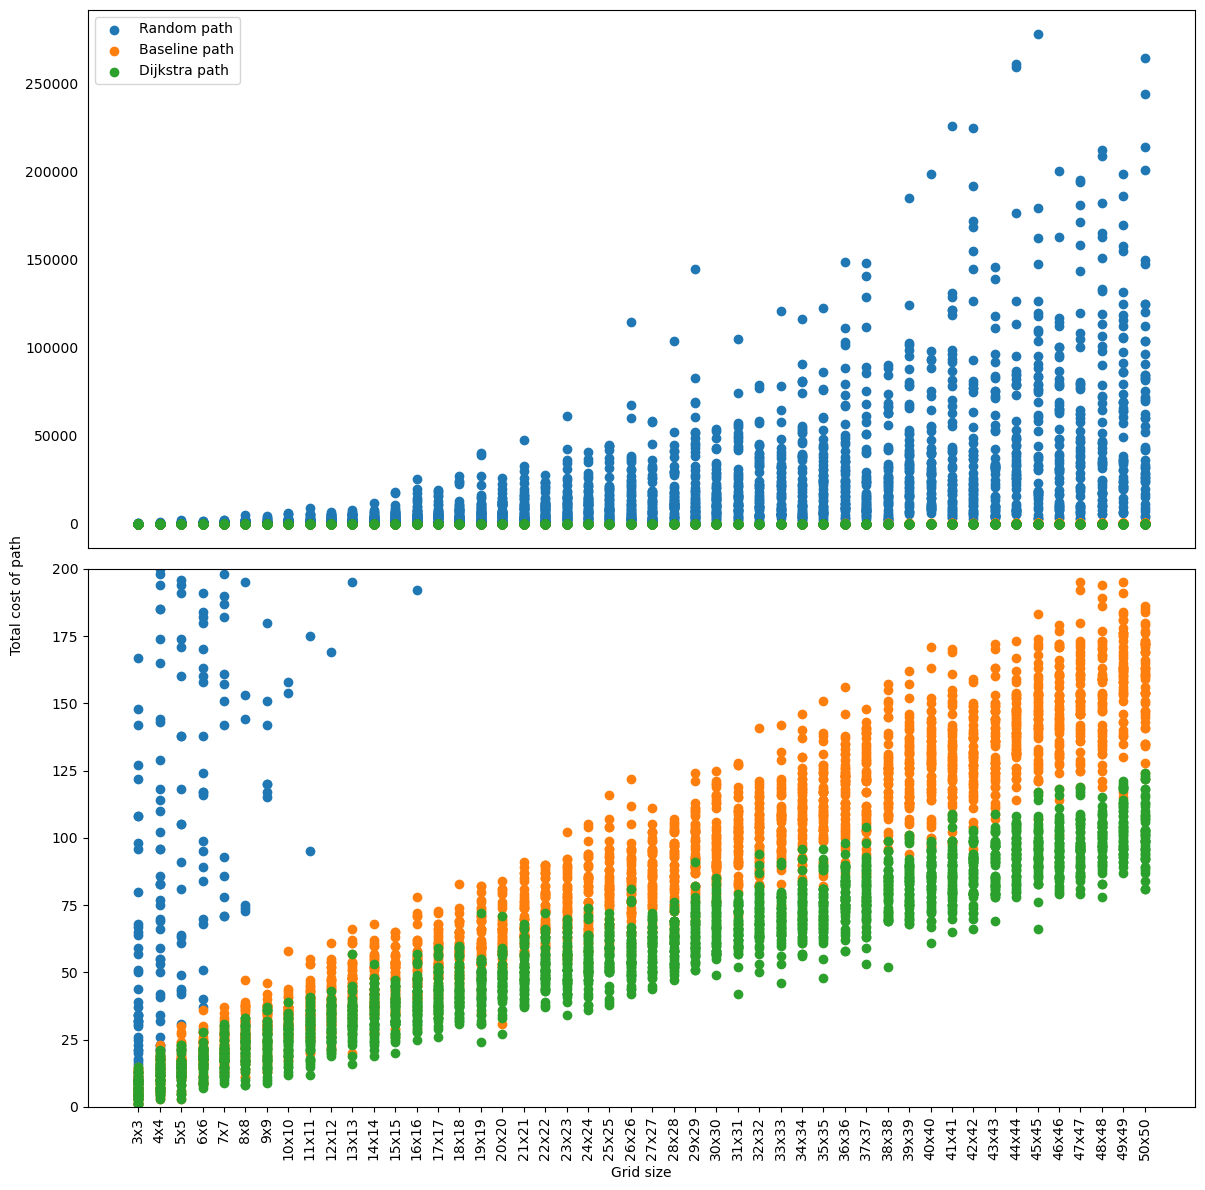

In [21]:
#Create 2 plots stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

#Display scatter chart for each algorithm
ax1.scatter(random_path_data["Grid size"], random_path_data["Path length"], label='Random path')
ax1.scatter(baseline_path_data["Grid size"], baseline_path_data["Path length"], label='Baseline path')
ax1.scatter(dijkstra_path_data["Grid size"], dijkstra_path_data["Path length"], label='Dijkstra path')

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display legend
ax1.legend()

#Display scatter chart for each algorithm again
ax2.scatter(random_path_data["Grid size"], random_path_data["Path length"], label='Random path')
ax2.scatter(baseline_path_data["Grid size"], baseline_path_data["Path length"], label='Baseline path')
ax2.scatter(dijkstra_path_data["Grid size"], dijkstra_path_data["Path length"], label='Dijkstra path')

#Rotate x tick labels so they don't overlap
ax2.tick_params(axis='x', labelrotation=90)


#Reduce the y limit for second graph so it's more zoomed in
ax2.set_ylim(0, 200)

#Set axes labels
ax2.set_xlabel("Grid size")
fig.text(0, 0.5, "Total cost of path", va='center', rotation='vertical')
plt.tight_layout() 

I then calculate the average path length for each algorithm, grouped by grid size.

In [22]:
#Group by grid size
grouped_random_path_data = random_path_data.groupby("Grid size").mean().reset_index()

#Map grid size to integers and sort it
replace = {}
for i in range(3,51):
    grid = f"{i}x{i}"
    replace[grid] = i
    
grouped_random_path_data["Grid size"] = grouped_random_path_data["Grid size"].replace(replace)
grouped_random_path_data = grouped_random_path_data.sort_values(by=['Grid size'])

#Map integers to grid size and reset indexes
replace = {v: k for k, v in replace.items()}
grouped_random_path_data["Grid size"] = grouped_random_path_data["Grid size"].replace(replace)
grouped_random_path_data = grouped_random_path_data.reset_index(drop=True)


#Group by grid size
grouped_baseline_path_data = baseline_path_data.groupby("Grid size").mean().reset_index()

#Map grid size to integers and sort it
replace = {}
for i in range(3,51):
    grid = f"{i}x{i}"
    replace[grid] = i
    
grouped_baseline_path_data["Grid size"] = grouped_baseline_path_data["Grid size"].replace(replace)
grouped_baseline_path_data = grouped_baseline_path_data.sort_values(by=['Grid size'])

#Map integers to grid size and reset indexes
replace = {v: k for k, v in replace.items()}
grouped_baseline_path_data["Grid size"] = grouped_baseline_path_data["Grid size"].replace(replace)
grouped_baseline_path_data = grouped_baseline_path_data.reset_index(drop=True)


#Group by grid size
grouped_dijkstra_path_data = dijkstra_path_data.groupby("Grid size").mean().reset_index()

#Map grid size to integers and sort it
replace = {}
for i in range(3,51):
    grid = f"{i}x{i}"
    replace[grid] = i
    
grouped_dijkstra_path_data["Grid size"] = grouped_dijkstra_path_data["Grid size"].replace(replace)
grouped_dijkstra_path_data = grouped_dijkstra_path_data.sort_values(by=['Grid size'])

#Map integers to grid size and reset indexes
replace = {v: k for k, v in replace.items()}
grouped_dijkstra_path_data["Grid size"] = grouped_dijkstra_path_data["Grid size"].replace(replace)
grouped_dijkstra_path_data = grouped_dijkstra_path_data.reset_index(drop=True)

I display the results in the bar charts below. **Note: this is not a stacked bar chart. The bars are just displayed over each other to compare them more easily.**

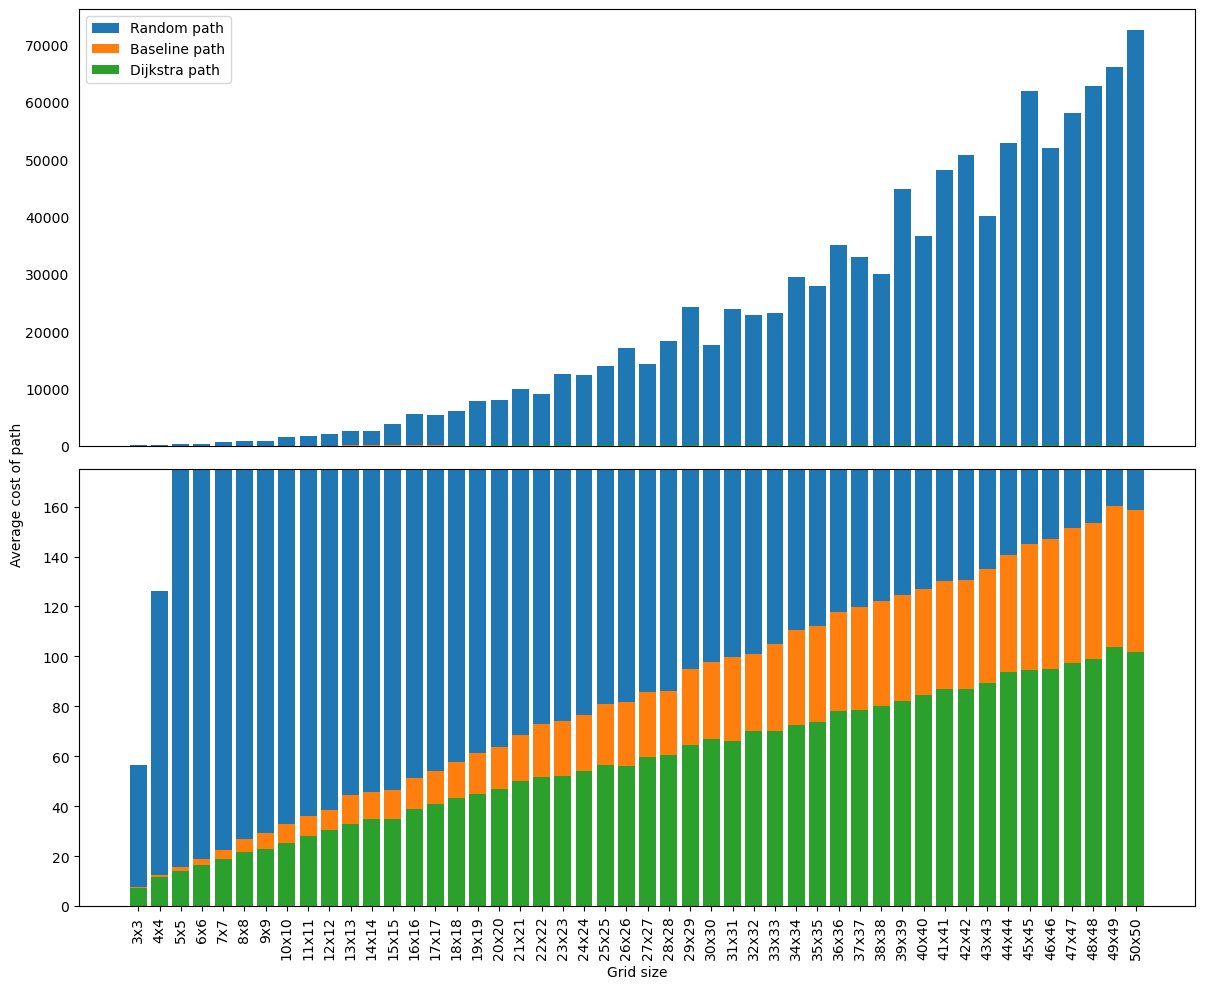

In [23]:
#Create 2 plots stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#Display bar chart for each algorithm
ax1.bar(grouped_random_path_data["Grid size"], grouped_random_path_data["Path length"], label='Random path')
ax1.bar(grouped_baseline_path_data["Grid size"], grouped_baseline_path_data["Path length"], label='Baseline path')
ax1.bar(grouped_dijkstra_path_data["Grid size"], grouped_dijkstra_path_data["Path length"], label='Dijkstra path')

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display legend
ax1.legend()

#Display bar chart for each algorithm again
ax2.bar(grouped_random_path_data["Grid size"], grouped_random_path_data["Path length"], label='Random path')
ax2.bar(grouped_baseline_path_data["Grid size"], grouped_baseline_path_data["Path length"], label='Baseline path')
ax2.bar(grouped_dijkstra_path_data["Grid size"], grouped_dijkstra_path_data["Path length"], label='Dijkstra path')

#Rotate x tick labels so they don't overlap
ax2.tick_params(axis='x', labelrotation=90)

#Reduce the y limit for second graph so it's more zoomed in
ax2.set_ylim(0, 175)

#Set axes labels
ax2.set_xlabel("Grid size")
fig.text(0, 0.5, "Average cost of path", va='center', rotation='vertical')
plt.tight_layout() 